![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

---

# Data-X: Introduction to TensorFlow v.2

<br>


**Author List (in no particular order):** [Elias Castro Hernandez](https://www.linkedin.com/in/ehcastroh/), [Rajarathnam Balakrishnan](https://www.linkedin.com/in/rajarathnam-balakrishnan-7b447b135/), and [Ikhlaq Sidhu](https://ikhlaq-sidhu.com/), [Debbie Yuen](http://www.debbiecyuen.me/) 

**Video Walkthrough:** To view walkthrough of this notebook, click [here]()

**References and Additional Resources:** See end of this notebook for additional information related to TensorFlow and Keras.

**License Agreement:** Feel free to do whatever you want with this code

___

<br> 
## Tensors and Operations


<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tensorflow_thumbnail-01.png" align="center" width="40%" padding="10"><br>
    <br>
    
</div>

<br>

<br>

[TensorFlow](https://www.tensorflow.org/) is a cross-platform, end-to-end, open source, platform for efficiently training and deploying machine learning models. TensorFlow offers multiple levels of abstractions, which means you can use high-level API's such as [Keras](https://keras.io/) or toolboxes like [Ludwig](https://ludwig-ai.github.io/ludwig-docs/index.html) to make things a bit simpler, or even to set up a [Distribution Strategy](https://www.tensorflow.org/guide/distributed_training) API on different hardware configurions without having to change the model defintion.

<br>

<strong style="color:red">KEY CONSIDERATION:</strong> Some of the following content may be written for machines running on Linux or Mac operating systems. If you are working on a Windows machine, you will need to enable the Linux Bash Shell, or adjust Shell commands to PowerShell syntax. A tutorial on how to enable the Linux Bash Shell on Windows 10 can be found [here](https://youtu.be/xzgwDbe7foQ).

___

<br>

**Setup TensorFlow**

> [TensorFlow V.2](https://www.tensorflow.org/tutorials/quickstart/beginner) removes redundant APIs, and integrates more smoothly with Python via Eager execution. To learn what has changed between versions 1 and 2 of TensorFlow, see [here](https://www.tensorflow.org/guide/effective_tf2). 
<br>

In [2]:
# Pyton 2 and 3 support
from __future__ import division, print_function, unicode_literals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

<br>

**Install TensorFlow:** the following will install TensorFlow using bash. It serves our purposes. However, for detailed installation instructions see the **Additional Resources** section at the end of this notebook.

In [4]:
## Create Virtual Environment ##
! python3 -m venv ./venv

In [6]:
## Activate Virtual Environment ##
! . ./venv/bin/activate

In [7]:
## Ensure pip version >= 19.0 ##
! pip install --upgrade pip 

Requirement already up-to-date: pip in /home/ehch/anaconda3/lib/python3.6/site-packages (20.2)


In [8]:
## Ensure TF version >= 2.0 ##
! pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /home/ehch/anaconda3/lib/python3.6/site-packages (2.3.0)


<br>

**Import TensorFlow**

In [9]:
# Canonical way of importing TensorFlow
import tensorflow as tf

___

**Note:** If ```import tensorflow as tf``` doesn't work, TensorFlow is not installed correctly. To resolve the issue see [build and install error messages](https://www.tensorflow.org/install/errors)
    
___

In [10]:
# Check tf version, oftentimes tensorflow is not backwards compatible
tf.__version__

'2.3.0'

In [11]:
# Check that Eager Execution is active
tf.executing_eagerly()

True

___

**Note:** TensorFlow V.2 comes with eager execution enabled by default. Eager mode has many benefits, but for our purposes eager mode allows tensor outputs to be viewed without the need of a session -- which may not be necessary depending on your needs.
___

<br>

## TensorBoard Setup

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tensorboard_logo_social.png" align="center" width="30%" padding="0px"><br>
    <br>
</div>

<br>

[TensorBoard](https://www.tensorflow.org/tensorboard/get_started) is a tool for measuring and visualizing machine learning workflows. It enables the tracking of important metrics such as [acuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy), it can display summary operations, tensor ouputs, project embeddings to lower dimensional space, and much more. This broad functionality makes TensorBoard an important tool in evaluating, optimizing, and debugging machine learning models. For a five-minute summary of TensorBoard, click [here](https://youtu.be/3bownM3L5zM).

___

<br>

**Load TensorBoard and Associated Libraries**

In [12]:
## Load TensorBoard notebook extension ##
%reload_ext tensorboard

In [13]:
## Load additional libraries needed ##
from datetime import datetime
from IPython.display import clear_output, Image, display, HTML
import os
import pathlib

t = datetime.utcnow().strftime("%Y%m%d%H%M%S") 
log_dir = "tf_logs"
logd = "/tmp/{}/r{}/".format(log_dir, t)

<br>

**Clear TensorBoard Logs**

In [14]:
## Clear any logs from previous runs ##
!rm -rf ./logs/

___

**Note:** The purpose of this section is only to highlight some of the commands for using TensorBoard. The [MNIST](https://en.wikipedia.org/wiki/MNIST_database) data set used here, is only for the purposes of highlighting functionality which on this case depends on the [Keras](https://keras.io/) library.

___

<br>

**Load, split, and create model**

In [15]:
# from Keras datasets import mnist
mnist = tf.keras.datasets.mnist

# load data into training and testing splits
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# create a sequential model
def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

___

**Note:** Click on the following to learn more about the command:
>[```keras.model.sequential( )```](https://keras.io/api/models/sequential/)<br>
>[```keras.layers.Flatten( )```](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)<br>
>[```keras.layers.Dense( ) ```](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)<br>
>[```keras.layers.Dropout( )```](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
    
___

<br>

**Compile, and Fit model. Also, add TensorBoard callbacks**

In [16]:
# instantiate model class
model = create_model()

# compile model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# place logs in a timestamped subdirectory and enable histogram computation with every epoch
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# Fit model
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          # Adding 'callbacks=[tensorboard_callback]' to model.fit( ) ensures that logs are created and stored
          callbacks=[tensorboard_callback])

Epoch 1/5
   1/1875 [..............................] - ETA: 0s - loss: 2.2475 - accuracy: 0.2500WARNING:tensorflow:From /home/ehch/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2208 - accuracy: 0.9347 - val_loss: 0.1094 - val_accuracy: 0.9663
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0972 - accuracy: 0.9698 - val_loss: 0.0845 - val_accuracy: 0.9729
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0689 - accuracy: 0.9783 - val_loss: 0.0730 - val_accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0541 - accuracy: 0.9821 - val_loss: 0.0678 - val_accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] 

___

**Note:** Click on the following to learn more about the command:
>[```model.compile( )```](https://keras.io/api/models/model/)<br>
>[```callbacks.TensorBoard( )```](https://keras.io/api/callbacks/)<br>
>[```model.fit( ) ```](https://keras.io/api/models/model_training_apis/)
    
___

<br>

**Display Tensorboard Logs**

In [17]:
## %tensorboard line magic. In command line run same command without "%" ##
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 16424), started 0:43:13 ago. (Use '!kill 16424' to kill it.)

___
**Note:** if TensorBoard does not load after following the above command, try reloading TensordBoard ```%reload_ext tensorboard``` 
___

<br>

## TensorFlow Tensors

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tF_update-03.png" align="center" width="50%" padding="0px"><br>
</div>

[Tensors](https://www.tensorflow.org/api_docs/python/tf/Tensor) are multidimensional arrays for working with data with more than 2-Dimensions. Tensors essentially multilinear maps from vector spaces to real numbers. Hence a tensor can be used to represent scalars, vectors, and matrices. Moreover, tensors are [highly efficient](https://realpython.com/numpy-tensorflow-performance/), can be ran on several architectures (CPUs, GPUs, Mobile, and Distributed), and make the calculation of gradients easier -- this is particulary useful as the analytical solution of gradients are extremely tedious to derive. To view the complete list of TensorFlow data types, see [here](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType).

<br>

#### **tf.constant**

___

<br>

[Constants](https://www.tensorflow.org/api_docs/python/tf/constant) are tensors, are initialized directly, and are immutable once created. In order to evaluate them, we used to have to run them in a [session (TF v.1)](https://www.tensorflow.org/api_docs/java/reference/org/tensorflow/Session). In TF v.2, they can be displayed using [eager execution](https://www.tensorflow.org/guide/eager) by default.

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tF_update-12.png" align="center" width="40%" padding="0px"><br>
    <br>
    Scalar (Rank-0) Tensor
</div>

In [18]:
# int32 tensors by default
rank_0_tensor = tf.constant(4)
b = tf.constant(5)

In [19]:
rank_0_tensor.numpy()

4

In [20]:
# tensors can also have names (in the computation graph)
named_tensor = tf.constant(7.2, name='my_named_tuple')
named_tensor.numpy()

7.2

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tF_update-11.png" align="center" width="40%" padding="0px"><br>
    <br>
    Vector (Rank-1) Tensor
</div>

In [21]:
# float vector tensor
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


In [22]:
# Contant Tensors are immutable
try:
    rank_1_tensor.assign(8)
except:
    print('Cannot assign constants')

Cannot assign constants


<br>

#### **tf.Variable**

A [variable](https://www.tensorflow.org/guide/variable) is the recommended way to represent data manipulated by your program. Variables are usually weights and biases of a model that are optimized during training, they also indicate the degrees of freedom of the model (what model parameters that can change, thus making the model flexible). The following covers how to create, update, and manage instances of [```tf.variable```](https://www.tensorflow.org/api_docs/python/tf/Variable).
___

In [23]:
# Create variable tensor
var = tf.Variable(3.)
var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [24]:
# Reassign the value of a Variable
var.assign(4)
var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.0>

___

**Remark:** why ```tf.constant()``` yet ```tf.Variable()```?  The lowercase ```c``` in ```tf.constant()``` is intended to indicate that tf.constant is an operation, while the capital ```V``` in ```tf.Variable```, is to indicate that it is a class with many operations.
___

<br>

#### **Multidimensional Tensors**

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tF_update-10.png" align="center" width="40%" padding="0px"><br>
    Matrix (Rank-2) Tensor
</div>

<br>

___

In [25]:
# tensors can be n-arrays, and we can specity data type
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


<br>

**Build tensors using distributions**

In [26]:
# we can also create multi dim Variables directly
c = tf.Variable(np.random.randn(3).reshape(3,1)) #reshape
# automatically assings data type
c #

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float64, numpy=
array([[-0.16088397],
       [-1.14103845],
       [-0.99069977]])>

<br>

**Build tensors from Python and NumPy objects**

In [27]:
# Altenatively, we can pass Python Lists or NumPy arrays
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_var = tf.Variable(my_tensor)
my_var

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [28]:
# view properties of tensor
print('\nname  : ', my_var.name)
print('\ntype  : ', my_var.dtype)
print('\nshape : ', my_var.shape)
print('\ndevice: ', my_var.device)
print("\nAs NumPy: ", my_var.numpy)


name  :  Variable:0

type  :  <dtype: 'float32'>

shape :  (2, 2)

device:  /job:localhost/replica:0/task:0/device:CPU:0

As NumPy:  <bound method BaseResourceVariable.numpy of <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>>


In [29]:
# Tensor operations
print("\nViewed as a tensor:", tf.convert_to_tensor(my_var))
print("\nIndex of highest value:", tf.argmax(my_var))


Viewed as a tensor: tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)

Index of highest value: tf.Tensor([1 1], shape=(2,), dtype=int64)


<br>

**Tensor Variable Assignments**

In [30]:
# This creates a new tensor; it does not reshape my_var.
print("\nCopying and reshaping (this creates a new tensor): ", tf.reshape(my_var, ([1,4])))


Copying and reshaping (this creates a new tensor):  tf.Tensor([[1. 2. 3. 4.]], shape=(1, 4), dtype=float32)


In [31]:
## Sanity Check ##

d = tf.Variable([4.0, 5.5])
# This will keep the same dtype, float32
d.assign([10, 20]) 

# Fails, as it resizes the variable 
try:
    d.assign([1.0, 2.0, 3.0])
except Exception as exc:
    print(f"{type(exc).__name__}: {exc}")

ValueError: Shapes (2,) and (3,) are incompatible


___

**Note:** Calling ```assign( )``` does not, usually, allocate a new tensor -- instead the tensor's memory is reused.

___

In [32]:
## Sanity Check ##

# Create a new variable based on valued of d
e = tf.Variable(d)
# make assignment
d.assign([10, 20]) 

# a and b are different
print(e.numpy())
print(d.numpy())

[10. 20.]
[10. 20.]


In [33]:
# Inplace increase/decrease variable values

f = tf.Variable(3.)
print('\noriginal value: ', f.numpy())
f.assign(10)
print('\nassigned value: ', f.numpy())
print('\nadd 1:', f.assign_add(1.).numpy())
print('\nsubtract 5:', f.assign_sub(5.).numpy())

# same but for arrays
print("\nIncrease/Decrease values in arrays")
print('original value: ',e.numpy())      
print('\nadd [1,4]: ', e.assign_add([1,4]).numpy())  
print('\nsubtract [3,5]', e.assign_sub([3,5]).numpy())  



original value:  3.0

assigned value:  10.0

add 1: 11.0

subtract 5: 6.0

Increase/Decrease values in arrays
original value:  [10. 20.]

add [1,4]:  [11. 24.]

subtract [3,5] [ 8. 19.]


<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tF_update-09.png" align="center" width="50%" padding="0px"><br>
    3D (Rank-3) Tensor
</div>

___

In [79]:
# Tensors with 3 or more axes (dimensions)
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])
                    
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


___

##### <strong style="color:blue">Concept Check:</strong>  Building high-dimensional tensors

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tF_update-08.png" align="center" width="50%" padding="0px"><br>
    4D (Rank-4) Tensor
</div>

<br>

To test your understanding of Tensors, create the above Tensor. For simplicity, make all entries equal to zero and name your tensor as ```rank_4_tensor```. 


In [32]:
# your code here

In [33]:
## Sanity Check ##
#print("\nType of elements:", rank_4_tensor.dtype)
#print("\nNumber of dimensions:", rank_4_tensor.ndim)
#print("\nShape of tensor:", rank_4_tensor.shape)
#print("\nElements along axis 0 of tensor:", rank_4_tensor.shape[0])
#print("\nElements along the last axis of tensor:", rank_4_tensor.shape[-1])
#print("\nTotal number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

___

<br>

#### **(Optional) Lifecycles, naming, and watching**

Similar to Python Objects, a ```tf.Variable``` instance has an [object lifecyle](https://en.wikipedia.org/wiki/Object_lifetime). For example, when there are no references to a variable it is automatically ignored and deallocated. Variable names are preserved when loading and saving models -- however, there is no need to assign them as variables in in models are uniquely named automatically.

___

In [34]:
# Altenatively, we can pass Python Lists or NumPy arrays
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])

In [35]:
# Create a and b; they have the same value but are backed by different tensors.
g = tf.Variable(my_tensor, name="Mark")

# A new variable with the same name, but different value
h = tf.Variable(my_tensor + 1, name="Mark")      # Note that the scalar add is broadcast (see intro_NUMPY for details)

# These are elementwise-unequal, despite having the same name
print(g == h)

tf.Tensor(
[[False False]
 [False False]], shape=(2, 2), dtype=bool)


<br>

#### **(Optional) Placing variables and tensors**

TensorFlow will always attempt to place tensors and variables on the fastest device compatible with the ```dtype```. However, this too is a process that can be overriden if desired. The following shows an example of such an instance. In particular, a float tensor and variable are placed on a CPU even if a GPU is available -- most variables are placed on a GPU if one is available. For more details on placing variables and tensors, see [here](https://www.tensorflow.org/guide/variable).
___

In [36]:
with tf.device('CPU:0'):

  # Create some tensors
  i = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  j = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
  k = tf.matmul(i, j)

print(k)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


___

**Note:** Placing variables is an important aspect of TF. This is because it is possible to set the location of a variable or tensor on one device, yet do the computation on another device. This may introduce delay when devices communicate with one-another, but should you want to have multiple GPU workers yet only one copy of the variables this approach is worth considering. See [automatic distribution](https://www.tensorflow.org/guide/autodiff) for details.


___

In [37]:
with tf.device('CPU:0'):
  l = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  m = tf.Variable([[1.0, 2.0, 3.0]])
    
with tf.device('GPU:0'):
  # Element-wise multiply
  n = l * m

print(n)

tf.Tensor(
[[ 1.  4.  9.]
 [ 4. 10. 18.]], shape=(2, 3), dtype=float32)


___

**Note:** [tf.config.set_soft_device_placement](https://www.tensorflow.org/api_docs/python/tf/config/set_soft_device_placement) is on by default. If you run the code above on a device witout a GPU, the multiplication will be ran on the CPU.
    
___

<br>

## TensorFlow Operations

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tF_update-04.png" align="center" width="50%" padding="0px"><br>
</div>

___

<br>

#### **Basic Arithmetic on Tensors**

___

In [34]:
# create tensors
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[10, 20],
                 [30, 40]]) 

In [35]:
# Addition
print(tf.add(a, b))

tf.Tensor(
[[11 22]
 [33 44]], shape=(2, 2), dtype=int32)


In [36]:
# Alternatively, element-wise addition using operator overloading
print(a + b)

tf.Tensor(
[[11 22]
 [33 44]], shape=(2, 2), dtype=int32)


In [37]:
# Element-wise multiplication
print(tf.multiply(a, b))

tf.Tensor(
[[ 10  40]
 [ 90 160]], shape=(2, 2), dtype=int32)


In [38]:
# Alternatively, element-wise multiplication using operator overloading
print(a * b)

tf.Tensor(
[[ 10  40]
 [ 90 160]], shape=(2, 2), dtype=int32)


In [39]:
# Use NumPy values
import numpy as np

ab = np.multiply(a, b)
print(ab)

[[ 10  40]
 [ 90 160]]


In [40]:
# Matrix multiplication
print(tf.matmul(a, b))

tf.Tensor(
[[ 70 100]
 [150 220]], shape=(2, 2), dtype=int32)


In [41]:
# Alternatively, Matrix multiplication
print(a @ b)

tf.Tensor(
[[ 70 100]
 [150 220]], shape=(2, 2), dtype=int32)


<br>

#### **Tensor Operations**

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tF_update-02.png" align="center" width="40%" padding="0px"><br>
</div>

<br>

The following represent a few operations on tensors. For a comprehensive list see [here](https://www.tensorflow.org/api_docs/python/tf/Tensor).

___



In [42]:
# tensor for analysis
c = tf.constant([[3.0, 7.0], [10.0, 2.0]])

In [43]:
# Find the largest value
print(tf.reduce_max(c))

tf.Tensor(10.0, shape=(), dtype=float32)


In [44]:
# Find the index of the largest value
print(tf.argmax(c))

tf.Tensor([1 0], shape=(2,), dtype=int64)


In [45]:
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(
[[1.7986210e-02 9.8201376e-01]
 [9.9966466e-01 3.3535014e-04]], shape=(2, 2), dtype=float32)


<br>

#### **Gradients from scrach**

> On the following examples, we are using [tf.GradientTape( )](https://www.tensorflow.org/api_docs/python/tf/GradientTape) to compute some example gradients. GradientTape is considered an advanced TensorFlow feature, but also an extremely powerful option for [advanced and custom differentiation](https://www.tensorflow.org/guide/advanced_autodiff).

___

In [46]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (6, 4)

In [47]:
# create a noisy dataset that resembles y=mx+b+some_noise
def noisy_data(m=0.3, b=.3, n=100):
    x = tf.random.uniform(shape=(n,))
    some_noise = tf.random.normal(shape=(len(x),), stddev=0.01)
    y = m * x + b + some_noise
    return(x, y)

In [48]:
# get some data
x_train, y_train = noisy_data()

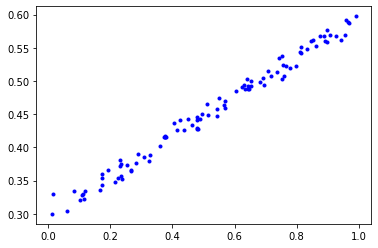

In [49]:
# visualize the data as scatter
plt.plot(x_train, y_train, 'b.')

In [50]:
# declare variables
m = tf.Variable(0.)
b = tf.Variable(0.)

In [51]:
# prediction
def pred_response(x):
    y = m * x + b
    return(y)

In [52]:
# loss function
def squared_error(y_pred, y_act):
    squaredError = tf.reduce_mean(tf.square(y_pred - y_act))
    return(squaredError)

In [53]:
# compute loss prior to training
loss = squared_error(pred_response(x_train), y_train)
print("Starting loss: ", loss.numpy())

Starting loss:  0.2136491


In [54]:
# gradient descent from scratch
learning_rate = 0.05
steps = 200

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = pred_response(x_train)
        loss = squared_error (predictions, y_train)
    
    # compute loss with respect to m and b
    gradients = tape.gradient(loss, [m, b])
    
    m.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)
   
    
    # track steps
    if i % 10 == 0:
        print("Step number: %d, has loss %f" % (i, loss.numpy()))


print("\nGradient after %d steps: " % steps, gradients)        

Step number: 0, has loss 0.213649
Step number: 10, has loss 0.014059
Step number: 20, has loss 0.001520
Step number: 30, has loss 0.000677
Step number: 40, has loss 0.000571
Step number: 50, has loss 0.000517
Step number: 60, has loss 0.000471
Step number: 70, has loss 0.000430
Step number: 80, has loss 0.000394
Step number: 90, has loss 0.000361
Step number: 100, has loss 0.000332
Step number: 110, has loss 0.000306
Step number: 120, has loss 0.000283
Step number: 130, has loss 0.000262
Step number: 140, has loss 0.000243
Step number: 150, has loss 0.000227
Step number: 160, has loss 0.000212
Step number: 170, has loss 0.000198
Step number: 180, has loss 0.000186
Step number: 190, has loss 0.000176

Gradient after 200 steps:  [<tf.Tensor: shape=(), dtype=float32, numpy=-0.0037134492>, <tf.Tensor: shape=(), dtype=float32, numpy=0.002074287>]


<br>

#### **Data Selection: Indexing and Slicing a Tensor**


TensorFlow follows standard Python indexing rules. For details see: [Indexing Tensors](https://www.tensorflow.org/guide/tensor#indexing)

___

<br>

**Single-Axis Indexing**

In [55]:
my_tensor = tf.constant([0, 1, 2, 3, 5, 6, 7, 8, 10, 20, 30, 40])
my_tensor

<tf.Tensor: shape=(12,), dtype=int32, numpy=array([ 0,  1,  2,  3,  5,  6,  7,  8, 10, 20, 30, 40], dtype=int32)>

In [56]:
# indexing with a sclar removes the dimension
print("First:", my_tensor[0].numpy())
print("Second:", my_tensor[1].numpy())
print("Last:", my_tensor[-1].numpy())

First: 0
Second: 1
Last: 40


<br>

**Single-Axis Slicing**

In [57]:
print("Everything:", my_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 8:", rank_1_tensor[2:8].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [ 0  1  2  3  5  6  7  8 10 20 30 40]
Before 4: [2. 3. 4.]
From 4 to the end: []
From 2, before 8: [4.]
Every other item: [2. 4.]
Reversed: [4. 3. 2.]


___

**Note:** Integer indexing removes the dimension, while range indexing (i.e. slice) keeps the dimension.
    
___

<br>

**Multi-Axis Indexing**

In [58]:
# reusing rank-2 tensor from before
print(rank_2_tensor.numpy())

[[1. 2.]
 [3. 4.]
 [5. 6.]]


In [59]:
# Pull out a single value from a 2-rank tensor
print(rank_2_tensor[2, 1].numpy())

6.0


In [60]:
# Get row and column tensors using combination of indexing and slices
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

Second row: [3. 4.]
Second column: [2. 4. 6.]
Last row: [5. 6.]
First item in last column: 2.0
Skip the first row:
[[3. 4.]
 [5. 6.]] 



<br>

#### **Manipulating Tensor Shapes**


Performing a tensor [reshape](https://www.tensorflow.org/guide/tensor#manipulating_shapes) will work so long as the shape of the new tensor has the same number of elements. 

___


In [61]:
# Shape returns a `TensorShape` object that shows the size on each dimension
var_x = tf.Variable(tf.constant([[1], [2], [3]]))
print(var_x.shape)

(3, 1)


In [62]:
# Convert tensor object into a Python list
print(var_x.shape.as_list())

[3, 1]


In [63]:
# Reshape a tensor to a new shape by passing a list
reshaped = tf.reshape(var_x, [1, 3])

# sanity check
print(var_x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


<br>

#### **(Optional) Broadcasting Tensors**

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tF_update-06.png" align="center" width="40%" padding="0px"><br>
    Broadcasted Tensor
</div>

<br>

[Broadcasting](https://www.tensorflow.org/guide/tensor#broadcasting) in TensorFlow is borrowed directly from the notion of [NumPy Array Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html). The general idea is that, under certain conditions, a smaller tensor can be 'stretched' to fit larger tensors when running combined operations on both.  Following are some examples of this concept.

___



In [68]:
# variable declarations
x = tf.constant([5, 7, 11])
y = tf.constant(3)
z = tf.constant([3, 3, 3])


In [69]:
# Same results
print(tf.multiply(x, 3))
print(x * y)
print(x * z)

tf.Tensor([15 21 33], shape=(3,), dtype=int32)
tf.Tensor([15 21 33], shape=(3,), dtype=int32)
tf.Tensor([15 21 33], shape=(3,), dtype=int32)


In [70]:
## To really grasp the idea: without broadcasting ##
x_stretch = tf.constant([[5, 5, 5, 5],
                         [7, 7, 7, 7],
                         [11, 11, 11, 11]])

y_stretch = tf.constant([[1, 2, 3, 4],
                         [1, 2, 3, 4],
                         [1, 2, 3, 4]])

# using operator overloading
result = x_stretch * y_stretch

print(result)

tf.Tensor(
[[ 5 10 15 20]
 [ 7 14 21 28]
 [11 22 33 44]], shape=(3, 4), dtype=int32)


In [71]:
## To really grasp the idea: with broadcasting ##
# These are the same computations
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[ 5]
 [ 7]
 [11]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 5 10 15 20]
 [ 7 14 21 28]
 [11 22 33 44]], shape=(3, 4), dtype=int32)


<br>

#### **(Optional) Ragged, String, and Sparse Tensors**


TensorFlow has several ways of dealing with 'abnormal' tensors. In particular:

> [Ragged Tensors](https://www.tensorflow.org/guide/tensor#ragged_tensors) - variable number of element along some axis.<br>
> [String Tensors](https://www.tensorflow.org/guide/tensor#string_tensors) - atomic dtype that cannot be indexed similar to Python strings.<br>
> [Sparse Tensors](https://www.tensorflow.org/guide/tensor#sparse_tensors) - for handling sparse data, like a very wide embedding space.

___


<br>

## TensorFlow Graphs and Executions

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tF_update-07.png" align="center" width="40%" padding="0px"><br>
</div>

___

<br>

#### **TensorFlow Computation Function**

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tF_update-01.png" align="center" width="50%" padding="0px"><br>
</div>

In TensorFlow (TF) 2.0, you can decorate Python functions using ```tf.function``` to mark them for [just in time (JIT)](https://docs.w3cub.com/tensorflow~guide/performance/xla/jit/) compilation. Meaning that TensorFlow runs it as [single graph*](https://github.com/tensorflow/community/pull/20). This change is done to make TensorFlow more 'Pythonic' -- which enables eager execution by default, encourages the encapsulation of graph computations as Python functions, and aligns the 'state' in the TensorFlow runtime with the state in the Python program.  All that to say, **Functions, not sessions in TF 2.0**:

```python
    # TensorFlow 1.X
    outputs = session.run(f(placeholder), feed_dict={placeholder: input})
    # TensorFlow 2.0
    outputs = f(input)
```

Just in case it wasn't clear, [using graphs directly is deprecated in TF 2.0](https://www.tensorflow.org/api_docs/python/tf/Graph#using_graphs_directly_deprecated).

___

<br>

#### **TensorFlow Function -- \@tf.function**

The [\@tf.function](https://www.tensorflow.org/api_docs/python/tf/function) compiles a function into a callable [TensorFlow graph](https://www.tensorflow.org/api_docs/python/tf/Graph).  Use the ```tf.function``` to get performant and portable models, but note that ```tf.function``` is not a one-size-fits-all solution for faster computation.  For more on common issues you may enconter when using ```tf.function``` and how to deal with them, see [here](https://www.tensorflow.org/guide/function#basics). Now let's get to some TF functions.

___


In [64]:
# example function
@tf.function
def f(x,y):
    return(x ** 2 + y)

In [65]:
x = tf.constant([2, 4])
y = tf.constant([4, -2])

In [66]:
f(x,y)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 8, 14], dtype=int32)>

<br>

**\@tf.function Control Flow**

In [67]:
# tf.function() may use data-dependent control flow 
@tf.function() 
def g(x):
    if tf.reduce_sum(x) > 0:
        return(x * x)
    else: 
        return(-x // 2)

In [68]:
# function call
g(tf.constant(4.7))

<tf.Tensor: shape=(), dtype=float32, numpy=22.089998>

___

**Note:** ```tf.function()``` can handle ```if```, ```for```, ```while```, ```continue```, ```break```, and ```return``` control flow statements.
___

<br>

**\@tf.function with** [**tf.Tensor**](https://www.tensorflow.org/api_docs/python/tf/Tensor) **and** [**tf.Variable**](https://www.tensorflow.org/api_docs/python/tf/Variable) **Objects**

In [69]:
@tf.function
def h():
  return(x ** 2 - y)

In [70]:
x = tf.constant([-2, -4])
y = tf.Variable([-4, -2])
h()

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 8, 18], dtype=int32)>

<br>

**\@tf.function with side effects, such as** [**tf.print**](https://www.tensorflow.org/api_docs/python/tf/print) **and** [**tf.Variable**](https://www.tensorflow.org/api_docs/python/tf/Variable)

In [71]:
@tf.function
def f_se(x):
  for i in tf.range(x):
    c.assign_add(i)


In [72]:
# before side-effects
c = tf.Variable(4)
c

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=4>

In [73]:
# function call
f_se(3)
# after side-effects
c

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=7>

___

**Key Point:** Any Python side-effects -- such as printing with ```print()```, appending to a list, etc. -- will only happen once as ```func```, in this case named ```f_se()```, is traced. If side-effects are desired in [tf.function](https://www.tensorflow.org/api_docs/python/tf/function), then they need to be written as TF ops. More on this below.
___

<br>

**Handling side effects**

In [74]:
l = []

# appends only once when tracing
@tf.function
def f(x):
  for i in x:
    l.append(i + 1)    


In [75]:
# function call on constant
print(f(tf.constant([2, 4, 9])))

None


In [76]:
# examine side-effects
l

[<tf.Tensor 'while/add:0' shape=() dtype=int32>]

In [79]:
# function call on Variable
print(f(tf.Variable([2, 4, 9])))


None


In [78]:
# it adds object, not 1 to every element
l

[<tf.Tensor 'while/add:0' shape=() dtype=int32>,
 <tf.Tensor 'while/add:0' shape=() dtype=int32>]

In [81]:
# appends in tf.function
@tf.function
def g(x):
  temp = tf.TensorArray(dtype=tf.int32, size=0, dynamic_size=True)
  for i in range(len(x)):
    temp = temp.write(i, x[i] + 1)
  return(temp.stack())


In [82]:
# function call
g(tf.constant([2, 4, 9]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 3,  5, 10], dtype=int32)>

<br>

**\@tf.function is Polymorphic**

In [83]:
@tf.function
def g(x):
  return(x + 1)

In [84]:
# function call with int32
g(tf.constant([2, 4, 9]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 3,  5, 10], dtype=int32)>

In [85]:
# function call with floats32
g(tf.constant([2.0, 4.0, 9.0]))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 3.,  5., 10.], dtype=float32)>

___

**Key Point:** [tf.function](https://www.tensorflow.org/api_docs/python/tf/function) can build more than one graph to support different data types or shapes as it encounters them. To obtain an individual graph, use the ```get_concrete_function``` method of the callable created by ```tf.function```. Example follows.
___

In [86]:
# source function for individual graph
@tf.function
def h(x):
  return(tf.abs(x))

In [87]:
# Build individual graphs
f1 = h.get_concrete_function(1)
f2 = h.get_concrete_function(2)  # Slow 
print("f1 == f2?", f1 is f2)

f1 == f2? False


In [88]:
print(f1)
f1

ConcreteFunction h(x=1)
  Returns:
    int32 Tensor, shape=()


<ConcreteFunction h(x=1) at 0x7FC2AAA82C50>

In [89]:
print(f2)
f2

ConcreteFunction h(x=2)
  Returns:
    int32 Tensor, shape=()


<ConcreteFunction h(x=2) at 0x7FC2AA96A518>

In [90]:
# Reuse graph created when f1 is traced
f1 = h.get_concrete_function(tf.constant(1))
f2 = h.get_concrete_function(tf.constant(2))  # Fast 
print("f1 == f2?",f1 is f2)

f1 == f2? True


In [91]:
print(f1)
f1

ConcreteFunction h(x)
  Args:
    x: int32 Tensor, shape=()
  Returns:
    int32 Tensor, shape=()


<ConcreteFunction h(x) at 0x7FC2AA9884E0>

In [92]:
print(f2)
f2

ConcreteFunction h(x)
  Args:
    x: int32 Tensor, shape=()
  Returns:
    int32 Tensor, shape=()


<ConcreteFunction h(x) at 0x7FC2AA9884E0>

___

**Key Point:** Recall that [tf.function](https://www.tensorflow.org/api_docs/python/tf/function) is polymorphic. As such, ```tf.function``` instantiates a separte graph for every unique input -- shape or datatypes. An [input signature](https://www.python.org/dev/peps/pep-0362/) can be provided to ```tf.function``` to control how the graph is traced. This is useful to avoid creating multiple graphs when tensors have dynamic shapes, or to restrict the shape and datatype of tensors that can be used. Example follows.
___

<br>

**\@tf.function without and with** [**Input Signatures**](https://www.python.org/dev/peps/pep-0362/)

**No Input Signatures**

In [93]:
@tf.function
def f(x):
  return(x + 1)

In [94]:
# different shapes
vector = tf.constant([1.0, 1.0])
matrix = tf.constant([[3.0]])

In [95]:
f1 = f.get_concrete_function(vector) 
f2 = f.get_concrete_function(matrix)

print("f1 == f2?", f1 is f2)

f1 == f2? False


In [96]:
print(f1)
f1

ConcreteFunction f(x)
  Args:
    x: float32 Tensor, shape=(2,)
  Returns:
    float32 Tensor, shape=(2,)


<ConcreteFunction f(x) at 0x7FC2AAA07400>

In [97]:
print(f2)
f2

ConcreteFunction f(x)
  Args:
    x: float32 Tensor, shape=(1, 1)
  Returns:
    float32 Tensor, shape=(1, 1)


<ConcreteFunction f(x) at 0x7FC2AAA33B00>

**Using Input Signatures**

In [98]:
# modify previous function to include an input signature
@tf.function(
    input_signature=[tf.TensorSpec(shape=None, dtype=tf.float32)])
def g(x):
  return(x + 1)

In [99]:
# same shapes as before
vector = tf.constant([1.0, 1.0])
matrix = tf.constant([[3.0]])


In [100]:
f1 = g.get_concrete_function(vector) 
f2 = g.get_concrete_function(matrix)

print("f1 == f2?", f1 is f2)


f1 == f2? True


In [101]:
print(f1)
f1

ConcreteFunction g(x)
  Args:
    x: float32 Tensor, shape=<unknown>
  Returns:
    float32 Tensor, shape=<unknown>


<ConcreteFunction g(x) at 0x7FC2901187F0>

In [102]:
print(f2)
f2

ConcreteFunction g(x)
  Args:
    x: float32 Tensor, shape=<unknown>
  Returns:
    float32 Tensor, shape=<unknown>


<ConcreteFunction g(x) at 0x7FC2901187F0>

<br>

___

**Final Comments:** When using TF 2.0, it is recommended that users refactor their code into smaller functions that are called as needed. Moreover, it's not necessary to decorate each of these smaller functions with ```tf.function```; only use ```tf.function``` to decorate high-level computations -- for example, one step of training or the forward pass of your model.

Also, when **creating variables** -- such as those created locally and returned -- keep in mind that a variable can only be created once. If you plan on creating local variables that are returned it is recommended to create stateful objecets like [tf.Variable](https://www.tensorflow.org/api_docs/python/tf/Variable) outside of [tf.function](https://www.tensorflow.org/api_docs/python/tf/function) and passing them as arguments.

___

## References and Additional Resources
___



<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tf_logo_social.png" align="center" width="30%" padding="0px"><br>
    <br>
</div>

___

<br>

#### Install Python Development Environment

<br>

**Install/Update pip3**

https://pip.pypa.io/en/stable/installing/

```bash
    # TensorFlow requires pip version >= 19.0
    $ pip install --upgrade pip 
```

<br>

**Install/Update Python 3**

https://www.python.org/downloads/

```bash
    # TensorFlow requires Python 3.5-3.8 
    $ sudo apt-get update && sudo apt-get install python3-dev python3-pip python3-venv python-virtualenv
```

___

<br>

#### Creating a TensorFlow Virtual Environment (Recommended)

<br>

**Create virtual environment**

>On a terminal, or using magic keys, create a new virtual environment using a Python interpreter and creating a ```venv``` directory to hold it

```bash
    $ python3 -m venv venv
```

<br>

**Activate the virtual environment**

```bash
    $ source ./venv/bin/activate      # sh, bash, or zsh

    $ . ./venv/bin/activate.fish       # fish

    $ source ./venv/bin/activate.csh  # csh or tcsh
```

<br>

**Install packages within virtual environment**

When the virtual environment is active, your shell prompt is prefixed by ```(venv)```

> Step 1: reapeat 1.1.1 above, within ```(venv)```<br>

```bash
    # TensorFlow requires pip version >= 19.0
    $ pip install --upgrade pip 
```    

> Step 2: Install TensorFlow2

```bash
    (venv) $ pip install --upgrade tensorflow
```


> Step 3: Verify install

```bash
    (venv) $ python -c "import tensorflow as tf;print(tf.reduce_sum(tf.random.normal([1000, 1000])))"
```

> Step 4: To exit virtual enviroment later

```bash
    (venv) $ pip deactivate
```

___

<br>

#### Install TensorFlow on Local Machine (Optional Setup)

<br>

**TensorFlow 2**

https://www.tensorflow.org/install/pip

```bash
    # Install using pip
    $ pip install --upgrade tensorflow 
```

<br>

**Verify Installation**

```bash
    $ python -c "import tensorflow as tf;print(tf.reduce_sum(tf.random.normal([1000, 1000])))"
```

___

<br>

#### Run TensorFlow in a Container (Optional Setup)

[Tensorflow Docker images](https://www.tensorflow.org/install/docker) come pre-configured to run TensorFlow, and provide a virtual environment that is generally the easiest way to set up [GPU processing](https://www.tensorflow.org/install/gpu). To learn more about how to use [Docker](https://www.tensorflow.org/install/docker/) to separate your applications from your infrastructure, click [here](https://docs.docker.com/get-docker/).

<br>

___

## Additional Content and Sources

> [TensorFlow Tutorials](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)<br>
> [TensorFlow Guide](https://youtu.be/dcqPhpY7tWk) <br>
> [Deep Learning with Python by Francois Chollet](https://www.manning.com/books/deep-learning-with-python)
> [Introduction to TensorFlow by Andrew Ng and Kian Katanforoosh](https://cs230.stanford.edu/blog/tensorflow/)<br>
> [Deep Learning Illustrated by Jon Krohn, Grant Beyleveld, and Aglae Bassens](https://www.deeplearningillustrated.com/)<br>
> [Hands-On Introduction to TensorFlow 2.0 by Josh Gordon and Amit Patankar](https://youtu.be/Yyv-ng0_OTU)<br>
> [Getting Started with TensorFlow and Deep Learning by Josh Gordon](https://youtu.be/tYYVSEHq-io)

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="DataX_icon_wide_logo.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>

___